In [1]:
#link to dataset: https://data.usgs.gov/datacatalog/data/USGS:60bfb8a4d34e86b938916d6f


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [3]:
url= "https://www.sciencebase.gov/catalog/file/get/60bfb8a4d34e86b938916d6f?f=__disk__1e%2Ff1%2F4f%2F1ef14feff3b038ff6ccb9f4e755e71dc47835e95"
data=pd.read_csv(url)
data

df = data[['Site','Status','Lat','Lon','Elevation','VAR','MAR','CAR']].copy()
df

Site       Status        Lat        Lon  Elevation  VAR  \
0       Fort de Soto     Mangrove  27.627500 -82.715883      -77.6  4.4   
1       Fort de Soto     Mangrove  27.627500 -82.715883      -78.6    3   
2       Fort de Soto     Mangrove  27.627500 -82.715883      -79.6  3.2   
3       Fort de Soto     Mangrove  27.627500 -82.715883      -80.6  2.8   
4       Fort de Soto     Mangrove  27.627500 -82.715883      -81.6    3   
..               ...          ...        ...        ...        ...  ...   
272  Upper Tampa Bay  Salt Barren  28.007596 -82.631427       41.6        
273  Upper Tampa Bay  Salt Barren  28.007596 -82.631427       36.6        
274  Upper Tampa Bay  Salt Barren  28.007596 -82.631427       31.6        
275  Upper Tampa Bay  Salt Barren  28.007596 -82.631427       26.6        
276  Upper Tampa Bay  Salt Barren  28.007596 -82.631427       21.6        

       MAR    CAR  
0    675.0  178.0  
1    679.0    NaN  
2    681.0  127.0  
3    647.0    NaN  
4    904.0  145.0  
..     ...    ...  
272    NaN    NaN  
273    NaN    NaN  
274    NaN    NaN  
275    NaN    NaN  
276    NaN    NaN  

[277 rows x 8 columns]

In [4]:
mangroves= df[df.Status=="Mangrove"]
mangroves

Site    Status        Lat        Lon  Elevation  VAR    MAR  \
0     Fort de Soto  Mangrove  27.627500 -82.715883      -77.6  4.4  675.0   
1     Fort de Soto  Mangrove  27.627500 -82.715883      -78.6    3  679.0   
2     Fort de Soto  Mangrove  27.627500 -82.715883      -79.6  3.2  681.0   
3     Fort de Soto  Mangrove  27.627500 -82.715883      -80.6  2.8  647.0   
4     Fort de Soto  Mangrove  27.627500 -82.715883      -81.6    3  904.0   
..             ...       ...        ...        ...        ...  ...    ...   
266  Weedon Island  Mangrove  27.846063 -82.601500      -43.4         NaN   
267  Weedon Island  Mangrove  27.846063 -82.601500      -44.4         NaN   
268  Weedon Island  Mangrove  27.846063 -82.601500      -45.4         NaN   
269  Weedon Island  Mangrove  27.846063 -82.601500      -46.4         NaN   
270  Weedon Island  Mangrove  27.846063 -82.601500      -47.4         NaN   

       CAR  
0    178.0  
1      NaN  
2    127.0  
3      NaN  
4    145.0  
..     ...  
266    NaN  
267    NaN  
268    NaN  
269    NaN  
270    NaN  

[139 rows x 8 columns]

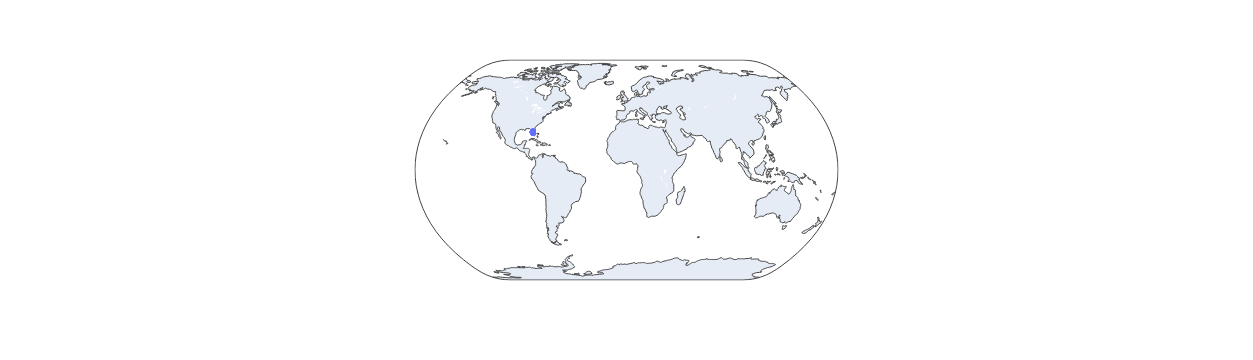

In [5]:
df = pd.read_csv(url)
#fig = px.scatter_geo(df, lat="Lat", lon="Lon",
#                     hover_name="Status", size="VAR",
#                     projection="natural earth")

fig = px.scatter_geo(df, lat="Lat", lon="Lon", projection="natural earth")
fig.show()

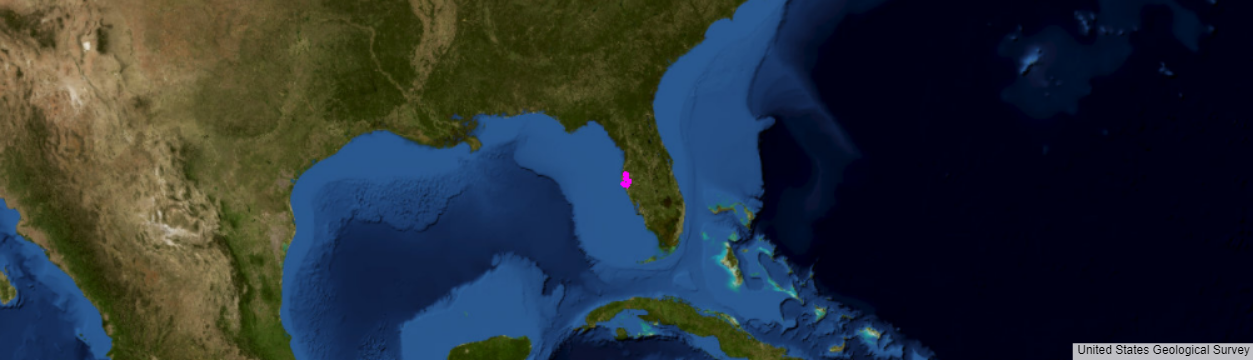

In [6]:
fig = px.scatter_mapbox(data, lat="Lat", lon="Lon", hover_name="Status",
                        color_discrete_sequence=["fuchsia"], zoom=4, height=200, width=200)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()